<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/Introduction_to_neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the neural network classification with  the  Tendorflowo
In this notebook we're going to learn how to erite a neural network for the classification problems

A classification is where you try to classify something as one of the thing or anotherthing

A few types if the Classification

*Binary Classificatioin

*Multiclass Classification

*Multilabel Classificatioin


#Creating Data to view & fit

In [85]:
from sklearn.datasets import make_circles
#make the 100 examples
n_samples=1000
#create circles
x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [86]:
#Check out the features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [87]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [88]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


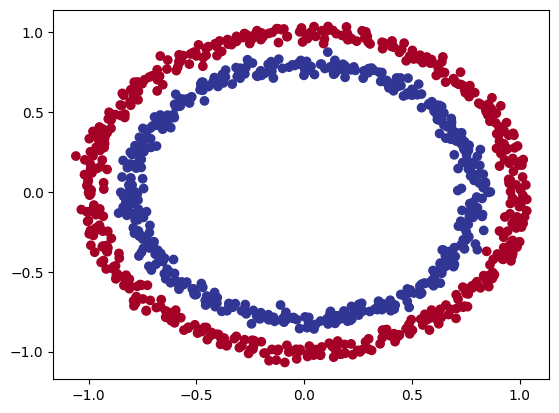

In [89]:
#visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

##Input and Output Shape

In [90]:
#Checking the shpaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [91]:
#no. of samples
len(x), len(y)

(1000, 1000)

In [92]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modeling

The steps in modeling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek the model
6. Evaluate

In [93]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [94]:

tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4953 - loss: 5.5222
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4777 - loss: 4.8671
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4793 - loss: 4.6841
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5250 - loss: 5.0545
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6149 - loss: 5.5303


In [95]:
##Improving the model by training for longer
model_1.fit(x,y,epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it guessing.

So, let's step things up a notch and add an extra layer




In [96]:


tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x,y,epochs=100, verbose=0)

model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

In [97]:
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322  


[8.059046745300293, 0.5]

##Improving our model


Adding the more  layers & increaes the layers of the hidden units

Using the different optimization function such as Adam

We also can fit more epochs for our model


In [98]:

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x,y,epochs=100, verbose=0)


In [99]:
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 0.6916  


[0.6938509345054626, 0.4909999966621399]

#Let's us create another model

In [100]:
tf.random.set_seed(42)
x_regression=tf.range(0,1000, 5)
y_regression=tf.range(100,1100,5)

x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]


y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


# x_regression, y_regression
x_reg_train.shape, x_reg_test.shape


(TensorShape([150]), TensorShape([50]))

In [101]:

tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 421.6899 - mae: 421.6899
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 278.9295 - mae: 278.9295
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 133.0721 - mae: 133.0721
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 53.8211 - mae: 53.8211
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 92.8877 - mae: 92.8877
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 68.1243 - mae: 68.1243
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 44.7455 - mae: 44.7455
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.6632 - mae: 51.6632 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 42.6422 - mae: 42.6422
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.8171 - mae: 45.8171 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.4835 - mae: 40.4835 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.2051 - mae: 41.2051 
Epoch 13/100
5/5 ━━

In [102]:
model_4.evaluate(x_reg_test,y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 50.7305 - mae: 50.7305 


[53.17977523803711, 53.17977523803711]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


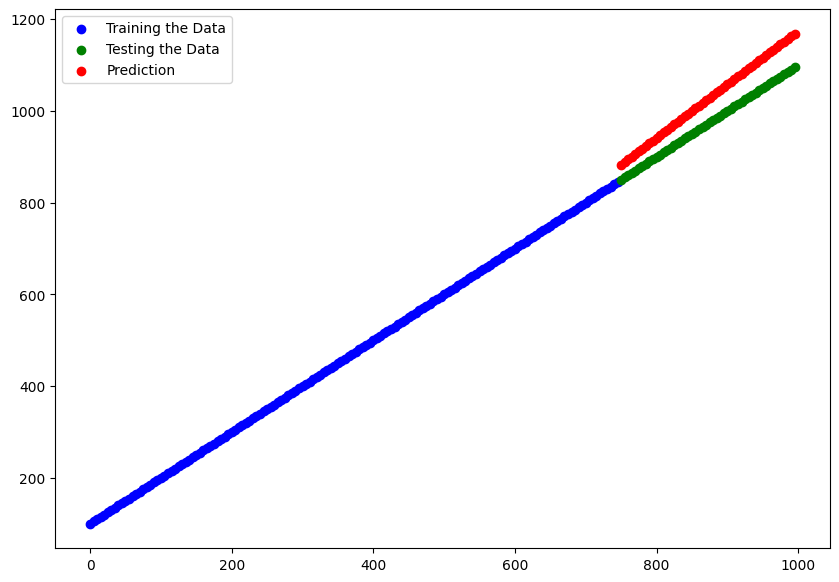

In [103]:
#making the predictioin with our trained model
y_reg_pred=model_4.predict(x_reg_test)
y_reg_pred

#plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training the Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing the Data")
plt.scatter(x_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend()

#The Missing Piece: Non-linearity part

In [104]:

tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(x, y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4535 - loss: 6.4430
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4533 - loss: 6.4361
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4545 - loss: 6.4301
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4549 - loss: 6.4294
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4557 - loss: 6.4092
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4581 - loss: 6.4176
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4581 - loss: 6.4171
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4584 - loss: 6.3962 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4597 - loss: 6.3863
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4608 - loss: 6.3832
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4608 - loss: 6.3823
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

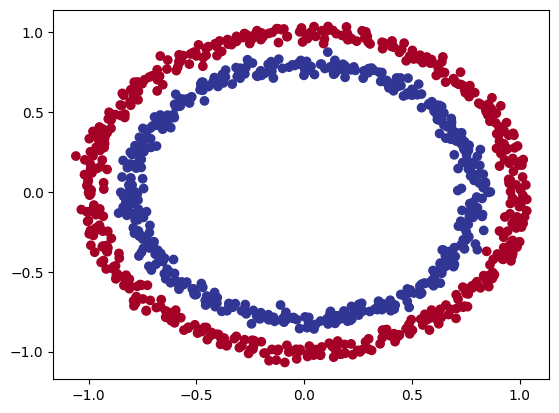

In [105]:
#checking our data
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [106]:
# #checking the decision boundary
# plot_decision_boundary(model=model_5,
#                        x=x,
#                        y=y)

#Building the first neural network with the non-linear activation function

In [107]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(x,y,epochs=100, verbose=1)



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4181 - loss: 4.8476
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4238 - loss: 4.7769
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4255 - loss: 4.7317
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4284 - loss: 4.7103
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4280 - loss: 4.7016
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4293 - loss: 4.6987
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4293 - loss: 4.6937
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 4.6908
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4300 - loss: 4.6891
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4289 - loss: 4.6518
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4339 - loss: 4.6273
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [108]:
model_6.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4357 - loss: 0.7460  


[0.7554924488067627, 0.41999998688697815]

In [109]:
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history = model_7.fit(x, y, epochs=250, verbose=1)

# x.shape, y.shape

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4955 - loss: 0.6925
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4888 - loss: 0.6916
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4919 - loss: 0.6909
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4892 - loss: 0.6903
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4945 - loss: 0.6896
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.6888
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4942 - loss: 0.6881
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 0.6873
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.6864
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 0.6855
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5224 - loss: 0.6845
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [110]:
model_7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0184  


[0.017676174640655518, 0.9990000128746033]

In [111]:
#how do our model's prediction loooks like
# plot_decision_boundary(model_7, x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


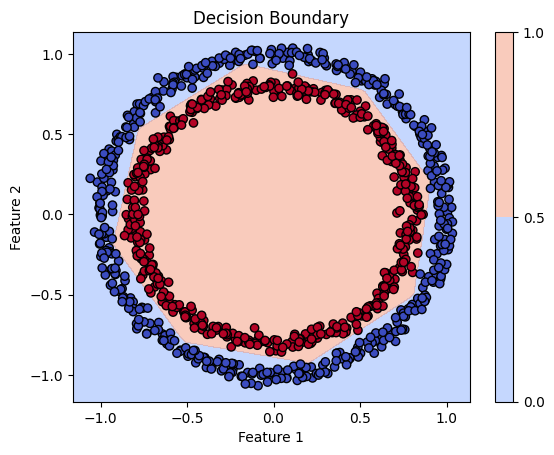

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of a trained model.

    Parameters:
    - model: Trained TensorFlow model
    - X: Input features (2D)
    - y: Target labels (binary classification)
    """
    # Define min and max values for the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a grid of points with a small step size
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Stack and reshape into (N, 2) for model predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for each grid point
    preds = model.predict(grid_points)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.5, cmap="coolwarm")
    plt.colorbar()

    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm", edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Call the function
plot_decision_boundary(model_7, x, y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


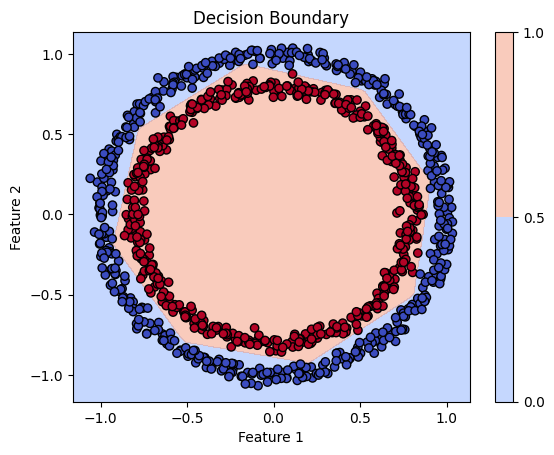

In [113]:
plot_decision_boundary(model_7, x, y)

In [114]:
#Create a toy tensor(similar to the data we pass into our model)
A=tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

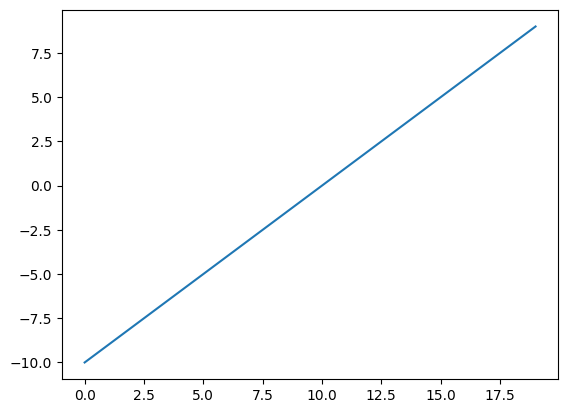

In [115]:
#vislauising our toy tensor
plt.plot(A)

In [116]:
#Let's start by replicating sigmoid -sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [117]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

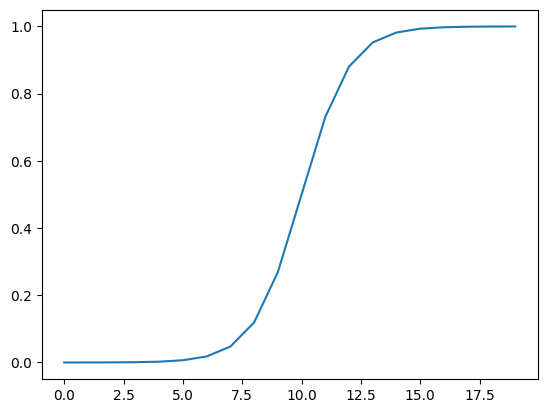

In [118]:
plt.plot(sigmoid(A))

In [119]:
#let's create the relu function
def relu(x):
  return tf.maximum(0,x)

In [120]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [121]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

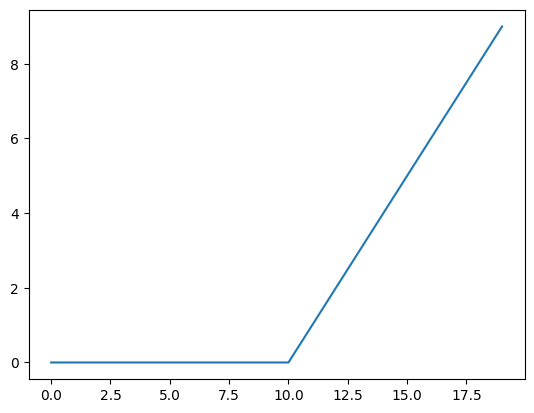

In [122]:
plt.plot(relu(A))

In [123]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [124]:
#let's try the linear activation functioin
# def linear(x):


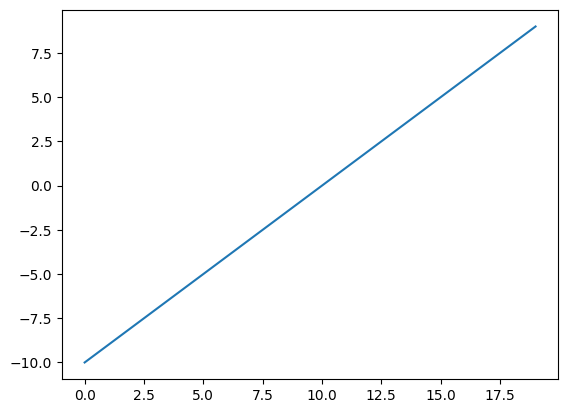

In [125]:
plt.plot(tf.keras.activations.linear(A))

In [126]:
#does A== tf.keras.activation.linear(A)
A== tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and Improving our Classification

In [127]:
x.shape,y.shape

((1000, 2), (1000,))

In [128]:
x_train, y_train=x[:800], y[:800]
x_test, y_test=x[800:], y[800:]

x_train.shape, x_test.shape,y_train.shape,  y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [129]:
#Creating the model to fit and to evaluate on the training and testing the data
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])


history = model_8.fit(x_train, y_train, epochs=25, verbose=1)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5092 - loss: 0.6905
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 0.6825
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5438 - loss: 0.6735 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6402 - loss: 0.6613 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 0.6437 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.6189 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.5742
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8590 - loss: 0.5171
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.4569 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9209 - loss: 0.3939
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9380 - loss: 0.3365 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.963

In [130]:
model_8.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9931 - loss: 0.0467  


[0.04531911015510559, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


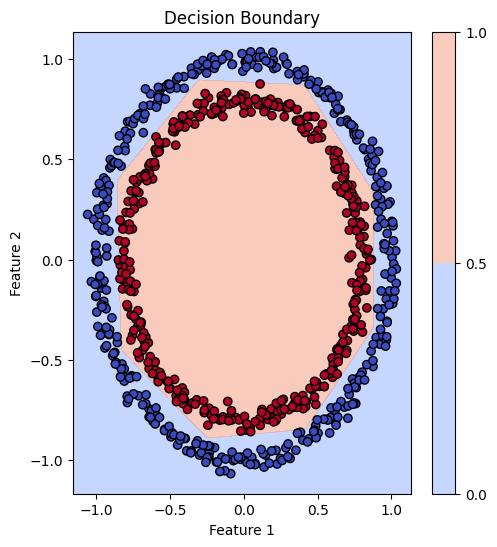

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


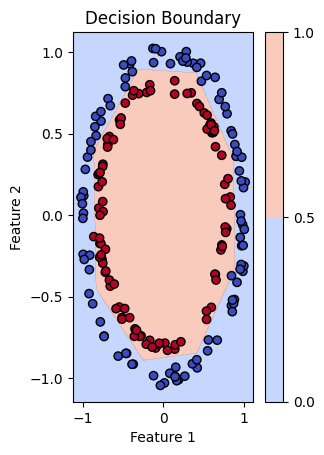

In [131]:
#ploting the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test,y_test)
plt.show();

##Plot thr loss (or training) curves

In [132]:
history.history

{'accuracy': [0.5149999856948853,
  0.550000011920929,
  0.5824999809265137,
  0.6700000166893005,
  0.7012500166893005,
  0.7487499713897705,
  0.8262500166893005,
  0.8849999904632568,
  0.9200000166893005,
  0.9462500214576721,
  0.956250011920929,
  0.9712499976158142,
  0.9825000166893005,
  0.9925000071525574,
  0.9912499785423279,
  0.9962499737739563,
  0.9962499737739563,
  0.9962499737739563,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858],
 'loss': [0.6916448473930359,
  0.6801913380622864,
  0.6687854528427124,
  0.653596043586731,
  0.6332195997238159,
  0.6041118502616882,
  0.5582386255264282,
  0.5009480714797974,
  0.4379183053970337,
  0.3750445544719696,
  0.316875159740448,
  0.2619246244430542,
  0.2119954228401184,
  0.17367145419120789,
  0.14471302926540375,
  0.12275157123804092,
  0.10563383251428604,
  0.09217225015163422,
  0.08114675432443619,
  0.07267

###Coverting the history object into a DataFrame

In [133]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.51500,0.691645
1,0.55000,0.680191
2,0.58250,0.668785
3,0.67000,0.653596
4,0.70125,0.633220
5,0.74875,0.604112
6,0.82625,0.558239
7,0.88500,0.500948
8,0.92000,0.437918
9,0.94625,0.375045


###Ploting the loss curves

Text(0.5, 1.0, 'Model_8 Loss Curves ')

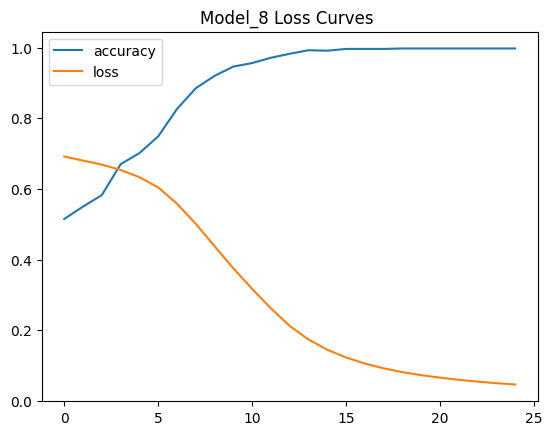

In [134]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves ")

##Finding the best learning rate

To find the best learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

*A learning rate **call back** - you can think of a call back as an extra piece of functionality, you can add to your *while* it's training.

*Another model (we could use the same one as above, but we're practicing building model)

*A modified loss curves plot

In [135]:
#Creating the model to fit and to evaluate on the training and testing the data
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])


#Create a learning rate call back
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5175 - loss: 0.6989 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5220 - loss: 0.6988 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5223 - loss: 0.6986 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.6984 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5108 - loss: 0.6982 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5074 - loss: 0.6979 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5021 - loss: 0.6976 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5019 - loss: 0.6974 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4991 - loss: 0.6971 - learning_

In [136]:
pd.DataFrame(history_9.history)

,accuracy,loss,learning_rate
0,0.48375,0.702085,0.000100
1,0.48500,0.701866,0.000112
2,0.48500,0.701632,0.000126
3,0.48000,0.701376,0.000141
4,0.48000,0.701096,0.000158
...,...,...,...
95,0.48375,0.764132,5.623413
96,0.48375,0.814044,6.309574
97,0.48375,0.869154,7.079458
98,0.48625,0.924503,7.943282


<Axes: xlabel='epochs'>

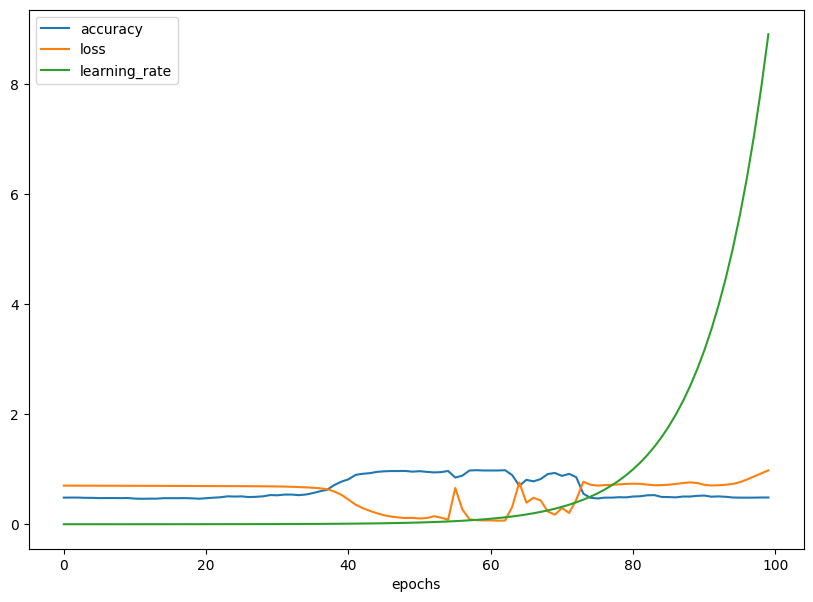

In [137]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

###Ploting the learning rate versus the loss


Text(0.5, 1.0, 'Learning Rate vs Loss')

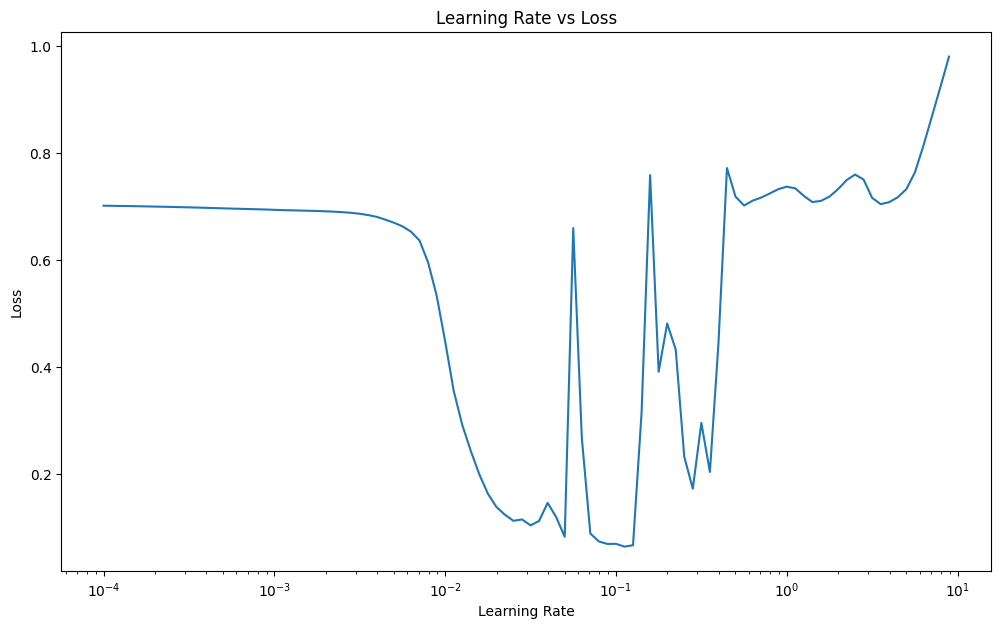

In [138]:
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [139]:
#let's try using the higher *ideal* learning rate with the same model before
#Creating the model to fit and to evaluate on the training and testing the data
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


#Create a learning rate call back
# lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_10 = model_10.fit(x_train, y_train, epochs=20)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5107 - loss: 0.6885
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5735 - loss: 0.6767
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.6466 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.5749
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8997 - loss: 0.4482 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9663 - loss: 0.2975 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.1966 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.1362 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.1005
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9942 - loss: 0.0805 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9933 - loss: 0.0667 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.99

In [140]:
model_10.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9842 - loss: 0.0476  


[0.04092254489660263, 0.9900000095367432]

In [141]:
model_8.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9931 - loss: 0.0467 


[0.04531911015510559, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


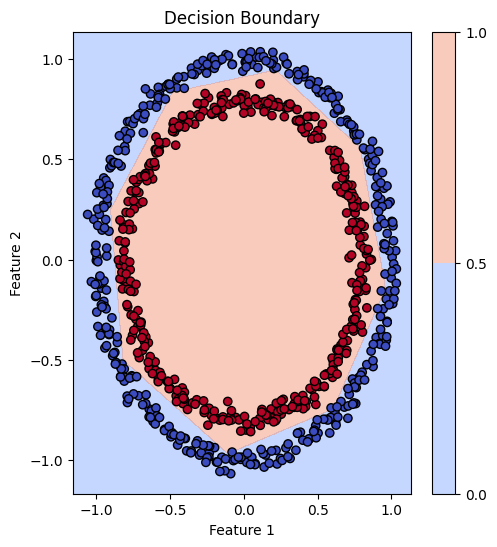

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


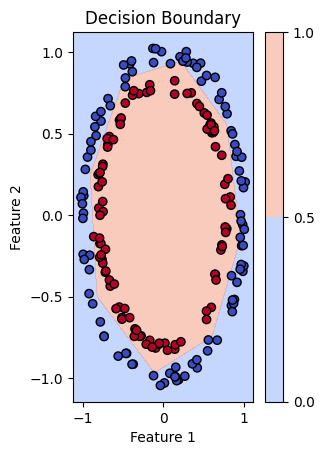

In [142]:
#plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_10, x_train, y_train)


plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, x_test, y_test)
plt.show()


#Introducing more classification evaluation methods

Alongside visualising our model results as much as possible, there are a handful of other classification evaluation methods that you should be familar with:

*Accuracy

*Precision

*Recall

*F1-score

*Confusion

*Classification report( from sklict lear)


In [143]:
#checking the accuaracy of our model
loss, accuracy =model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model Accuracy on the test set: {(accuracy*100):.2f}%")
# loss, accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9842 - loss: 0.0476 
Model loss on the test set: 0.04092254489660263
Model Accuracy on the test set: 99.00%


###How about the Confusion matries?

In [144]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#making the prediction
y_preds=model_10.predict(x_test)

#create confusion matrix
# confusion_matrix(y_test, y_preds)

##ValueError: Classification metrics can't handle a mix of binary and continuous targets

#-> we need to convert into the binary form

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [145]:
#Converting prediction probabilities to the Binary Format and view the first 10
y_preds_1=tf.round(y_preds)[:10]
y_preds_1

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [146]:
#creating the confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

#How about we preetify our confusion matrix


In [194]:
import itertools
figsize=(10,10)
#creating the confusion matrix
cm=confusion_matrix(y_test, tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion
n_class=cm.shape[0]

#let's preetify it
fig, ax=plt.subplots(figsize=figsize)

#create a matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#craete a classes
classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#label the axis
ax.set(title="Confusion Matrix",
       xlabel="Prediction Label",
       ylabel="True Lable",
       xticks=np.arange(n_class),
       yticks=np.arange(n_class),
       xticklabels=labels,
       yticklabels=labels)


ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set the threshold for thr different colors
threshold=(cm.max()+cm.min())/2

#plot the test on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)



ValueError: Found input variables with inconsistent numbers of samples: [200, 10000]

#Working wiht the larger example(multi class example)

when we have more than two classes as an option, it's known as **multi-class classification**

*This means if you have 3 different classes, it's multi class classificatin

*it also means if you have 100 different classes, it's multi class- classification

To practice the multi class classification, we're going to build a neural network to classify images of diffreent items of clothing.




In [148]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and tests set for us
(train_data, train_labels),(test_data, test_labels) =fashion_mnist.load_data()

In [149]:
#show the first training example

# train_data,train_labels
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [150]:
#check the shape of a single label
train_data[0].shape, train_labels[0].shape


((28, 28), ())

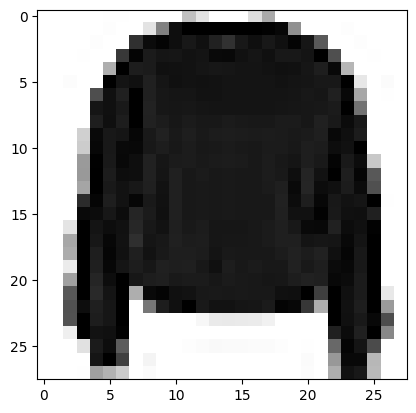

In [151]:
#plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7],cmap=plt.cm.binary);

In [152]:
#chech the sampl label
train_labels[7]

2

In [153]:
#create a small list so we can index onto our training label so they are human-readable
class_name=["T-shirt", "Trouser", " Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle-Boot"]
len(class_name)


10

Text(0.5, 1.0, 'Dress')

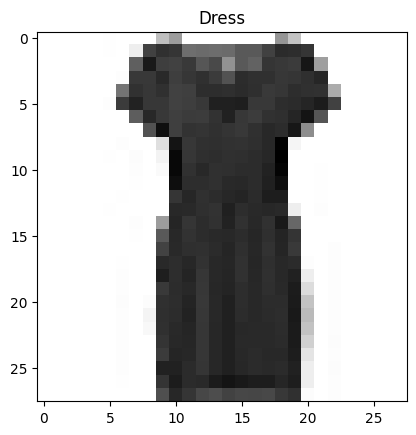

In [154]:
#plot an exapmle onject and its label
index_of_choice=20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

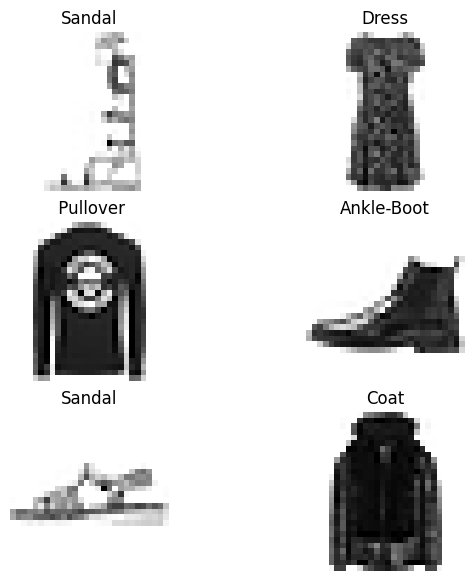

In [155]:
#ploting the multiple random images of the fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(6):
  ax=plt.subplot(3,2,i+1) ## Creating a 2x3 grid of subplots, placing the image in position (i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False) # Hiding the axis to make the images look cleaner

#Builduig a multi class classification model

For our multi class classification model, we can use a similar architecture to our binary  classifiers, however we are going to have to tweak a few things:

*Input shape: 28X28 (the shape of the one image)

*Output shape: 10(one per class of clothing)

*Loss Function:  tf.keras.CategoricalClassentropy()

  ->if your label are one-hot encoding, use CategoricalClassentropy()

  ->if your label are integer form, use CategoricalClassentropy()

*Output layer activation:  Softmax(notsigmoid)



In [156]:
#our data need to be flattened (from 28*28 to None, 784)

flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [157]:
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history=model_11.fit(train_data,
                              tf.one_hot(train_labels, depth=10),
                              epochs=10,
                              validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

                            #  (tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1136 - loss: 2.3562 - val_accuracy: 0.1408 - val_loss: 2.2183
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1680 - loss: 2.1155 - val_accuracy: 0.2173 - val_loss: 1.7782
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2476 - loss: 1.7559 - val_accuracy: 0.2479 - val_loss: 1.7427
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2729 - loss: 1.6819 - val_accuracy: 0.3014 - val_loss: 1.5945
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3122 - loss: 1.5904 - val_accuracy: 0.3174 - val_loss: 1.5583
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3248 - loss: 1.5588 - val_accuracy: 0.3272 - val_loss: 1.5351
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3265 - loss: 1.5416 - val_accuracy: 0.3246 - val_loss: 1.5292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3273 - loss: 1.5313 - 

In [158]:
model_11.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

###Neural Network prefer data to be scaled(or normalized), this means they like to have the numbers in tensor to find ptterns in  betweeen 0 & 1

In [159]:
train_data.min(), train_data.max()

(0, 255)

In [160]:
#we can get our training ans testing data betweeen 0 & 1 by dividing by the maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

#check the min and the max vlaues of the scaled training data
train_data_norm.min(), train_data_norm.max()
# train_data, test_data

(0.0, 1.0)

In [161]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history=model_12.fit(train_data_norm,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm, test_labels))




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4456 - loss: 1.5084 - val_accuracy: 0.7327 - val_loss: 0.8057
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7514 - loss: 0.7516 - val_accuracy: 0.7550 - val_loss: 0.7120
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7652 - loss: 0.6741 - val_accuracy: 0.7605 - val_loss: 0.6812
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7720 - loss: 0.6417 - val_accuracy: 0.7640 - val_loss: 0.6663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7755 - loss: 0.6236 - val_accuracy: 0.7661 - val_loss: 0.6558
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7787 - loss: 0.6116 - val_accuracy: 0.7680 - val_loss: 0.6457
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7828 - loss: 0.6028 - val_accuracy: 0.7723 - val_loss: 0.6382
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7847 - loss: 0.5960 -

##Note: Neural Network tend to prefer data in numerical form as well as scaled/normalised (numbers between 0 & 1)

<Axes: title={'center': 'Normalized Data'}>

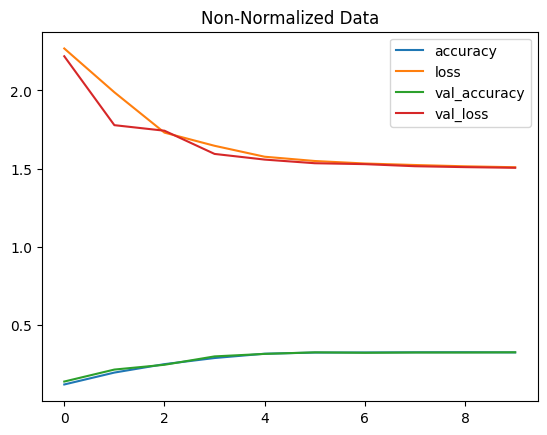

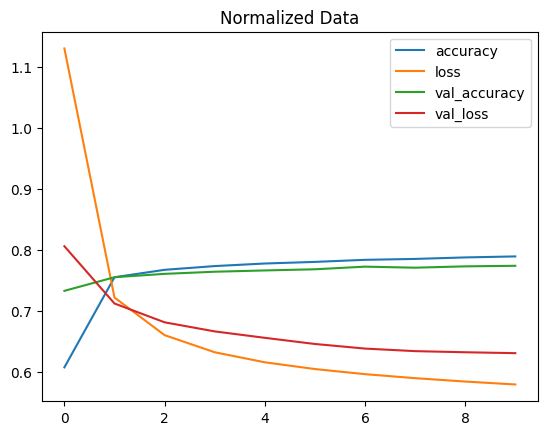

In [162]:
import pandas as pd
#plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

#plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

##Finding the idle learning rate



In [163]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu" ),
    tf.keras.layers.Dense(4, activation="relu" ),
    tf.keras.layers.Dense(10, activation="softmax" ),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#creating the learning rate call back
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))


find_lr_history=model_12.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3546 - loss: 1.7573 - val_accuracy: 0.6129 - val_loss: 1.1003 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6309 - loss: 1.0223 - val_accuracy: 0.7138 - val_loss: 0.7980 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7325 - loss: 0.7536 - val_accuracy: 0.7762 - val_loss: 0.6781 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7896 - loss: 0.6390 - val_accuracy: 0.7929 - val_loss: 0.6220 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8015 - loss: 0.5897 - val_accuracy: 0.7960 - val_loss: 0.6041 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8068 - loss: 0.5685 - val_accuracy: 0.8010 - val_loss: 0.5925 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8082 - l

Text(0.5, 1.0, 'Finding the idle learning Rate ')

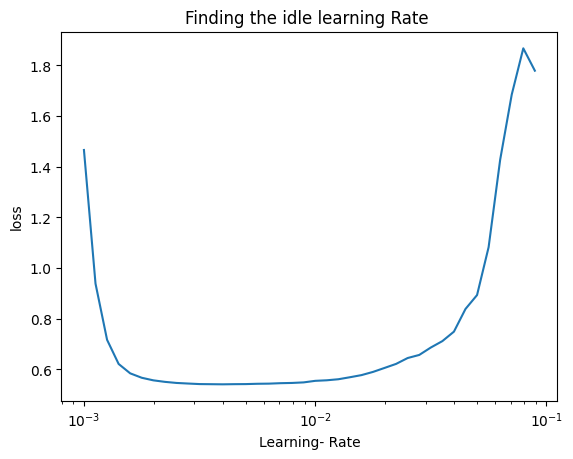

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel('Learning- Rate')
plt.ylabel("loss")
plt.title("Finding the idle learning Rate ")

In [211]:
#let's refit the a model with the idle learning
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu" ),
    tf.keras.layers.Dense(4, activation="relu" ),
    tf.keras.layers.Dense(10, activation="softmax" ),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
#creating the learning rate call back
# lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))


find_lr_history=model_12.fit(train_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4513 - loss: 1.4222 - val_accuracy: 0.7178 - val_loss: 0.7997
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7357 - loss: 0.7451 - val_accuracy: 0.7740 - val_loss: 0.6523
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7798 - loss: 0.6310 - val_accuracy: 0.7847 - val_loss: 0.6209
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7905 - loss: 0.6020 - val_accuracy: 0.7894 - val_loss: 0.6063
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7951 - loss: 0.5874 - val_accuracy: 0.7934 - val_loss: 0.5991
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7985 - loss: 0.5781 - val_accuracy: 0.7955 - val_loss: 0.5942
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8015 - loss: 0.5711 - val_accuracy: 0.7975 - val_loss: 0.5904
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8036 - loss: 0.5657 -

##Evaluating our multi class classificayion model

To evalaute our multi-class classificatioin model we could:

*Evaluate its performance using other classification metrices(such as a confusion matrix)

*Asses some of it's prediction( through visualization)

*Improve it's result (by training it for longer or changing the architecture)

*Save and export it for use in an application


##Let's go through the top 2


In [173]:
#create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, x_pred, classes=None,figsize=(10,10), text_size=15):

  #creating the confusion matrix
  cm=confusion_matrix(y_true, x_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion
  n_class=cm.shape[0]

  #let's preetify it
  fig, ax=plt.subplots(figsize=figsize)

  #create a matrix plot
  cax=ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)



  #set labels to be classes

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Prediction Label",
        ylabel="True Lable",
        xticks=np.arange(n_class),
        yticks=np.arange(n_class),
        xticklabels=labels,
        yticklabels=labels)


  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set the threshold for thr different colors
  threshold=(cm.max()+cm.min())/2

  #plot the test on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)




In [176]:
class_name

['T-shirt',
 'Trouser',
 ' Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle-Boot']

In [181]:
#make some prediction with our model
y_probs=model_12.predict(test_data_norm) #probs is short form of "Prediction Probability"
#view the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.63766638e-11, 7.64073775e-07, 4.45762333e-20, 1.94540888e-07,
        2.15435268e-13, 4.22981203e-01, 2.09344098e-10, 4.98377495e-02,
        1.00144367e-04, 5.27079999e-01],
       [1.14071439e-03, 2.21164555e-05, 3.81285012e-01, 2.54423432e-02,
        3.91089857e-01, 6.00790584e-10, 2.00985655e-01, 1.28015835e-24,
        3.42619533e-05, 1.20569888e-15],
       [8.75903152e-06, 9.99561965e-01, 3.26874068e-19, 4.29150648e-04,
        1.35509475e-12, 1.20770241e-18, 1.73795878e-09, 3.32852045e-35,
        2.93769566e-12, 8.82927457e-18],
       [1.47164325e-08, 9.99712706e-01, 4.87120623e-24, 2.87284318e-04,
        7.85327285e-16, 1.77640759e-19, 1.12963133e-12, 0.00000000e+00,
        2.22450837e-16, 1.70846618e-18],
       [7.24963471e-02, 4.84424061e-04, 3.91001761e-01, 7.98342898e-02,
        9.38573778e-02, 3.07686605e-06, 3.61541659e-01, 3.20580715e-16,
        7.81069510e-04, 4.22186522e-11]], dtype=float32)

In [180]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [182]:
y_probs[0]

array([5.6376664e-11, 7.6407377e-07, 4.4576233e-20, 1.9454089e-07,
       2.1543527e-13, 4.2298120e-01, 2.0934410e-10, 4.9837749e-02,
       1.0014437e-04, 5.2708000e-01], dtype=float32)

In [183]:
y_probs[0], tf.argmax(y_probs[0]), class_name[tf.argmax(y_probs[0])]

(array([5.6376664e-11, 7.6407377e-07, 4.4576233e-20, 1.9454089e-07,
        2.1543527e-13, 4.2298120e-01, 2.0934410e-10, 4.9837749e-02,
        1.0014437e-04, 5.2708000e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle-Boot')

In [186]:
#converting all of the prediction probabilities into integers
y_preds=y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 4, 1, 1, 2, 1, 6, 6, 5, 7])

In [187]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [188]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[797,   3,  16,  71,   0,   0,  98,   0,  15,   0],
       [ 14, 927,   4,  43,   0,   1,  10,   0,   1,   0],
       [ 28,   1, 744,  25,  92,   0, 107,   0,   3,   0],
       [ 70,  16,  51, 783,   2,   8,  66,   0,   4,   0],
       [  5,   0, 310,  58, 511,   0, 109,   0,   7,   0],
       [  0,   0,   0,   1,   0, 882,   1,  62,  14,  40],
       [186,   0, 150,  48, 139,   1, 445,   0,  31,   0],
       [  0,   0,   0,   0,   0,  39,   0, 927,   1,  33],
       [  5,   0,   7,   3,   2,   9,  44,   6, 924,   0],
       [  0,   0,   0,   0,   0,  29,   0,  72,   1, 898]])

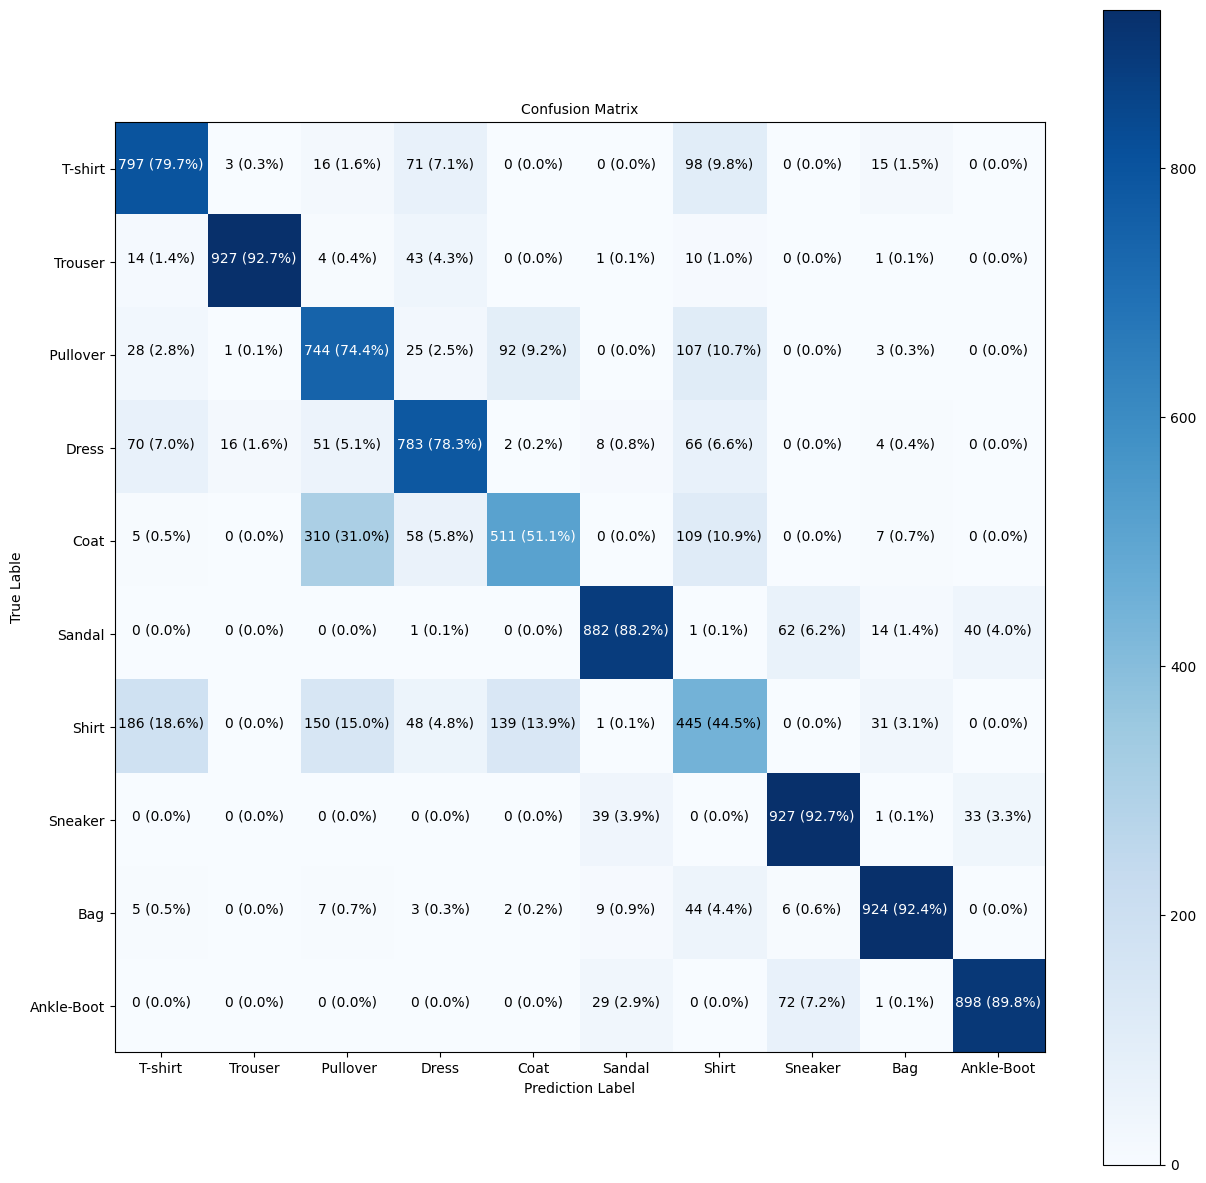

In [196]:
#making a prettier confusion matrix
make_confusion_matrix(test_labels,y_preds,class_name,
                      figsize=(15,15),
                      text_size=10)

In [209]:
import random
def plot_random_image(model, images, true_labels, class_name):
  """Picking a random images, plot it and the labels it with a prediction and truth table"""
  #set up random integer
  i=random.randint(0, len(images))
  #create a prediction and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #ploting th image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #changing the color of the titles depending on if the predictoin is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"


  # add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2:0f}% (True:{})". format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) #set the color to the red and green based on if prediction is righ or wrong

In [216]:
#checking out a random image as well as it's prediction
plot_random_image(model=model_12,
                  images=test_data,
                  true_labels=test_labels,
                  class_name=classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


TypeError: 'bool' object is not subscriptable